# Theorical Chip shape and thickness during wood peripheral planning

The peripheral planning of wood is produced by the successive engagement of the knives installed on the contour of a rotating tool. The combined movement of the workpiece and the tool produces a comma-shaped chip with increasing thickness (Figure 1). The knife initiates the chip with a thickness equal to zero, then, the wood continuing to advance and the tool to turn, this thickness increases up to maximum before the knife leaves the wood. The generated surface is composed of a series of successive machining waves.

The purpose of this script is to calculate in a theorical way the wood chip shape and thickness of the peripheral planning by using cutting parameters and parametric equations of wood machinning. 

### Inputs:
- feed speed (m/min)
- rotational speed (rpm)
- number of knives on cutterhead
- radius of cutter (mm)
- the pitch radius of the pinion (mm)


### Outputs:
- Wavelengths or feed per knife (mm)
- Cutting depth (mm)
- Chip shape


### Parametric equations:


####  Wavelengths or feed per knife (mm)

$$O= \frac {A}{Z * N}$$ 
Where: 
$A$: feed speed (m/min),
$Z$: number of knives on cutterhead,
$N$: rotational speed (rpm)

#### Height of the machining wave (mm)

$$h = \frac{O^2} {8 (R + \frac{O * Z}{\pi})}$$
Where: 
$O$: feed speed (m/min),
$Z$: number of knives on cutterhead,
$R$: radius of cutter (mm)

#### Average chip thickness (mm)

$$a_{av} = \frac {f}{N * Z} \sqrt {\frac {h}{D}}$$
where:
$a_{av}$: average chip thickness,
$f$: feed speed (m/min),
$N$: rotational speed (rpm),
$Z$: number of knives on cutterhead,
$h$: cutting depth (mm),
$D$: diameter of cutting circle (mm),

#### Theorical chip shape (according to Martelloti 1941)

$$X = r \alpha + R \sin (\alpha)$$
$$Y = R (1 - \cos \alpha)$$

$$\alpha = \arccos (\frac {R - h} {R}) $$


where: 
$X$: path of the cutting tool tooth in X coordinate, 
$Y$: path of the cutting tool tooth in Y coordinate,
$\alpha$: angle through which the cutter and pinion have rotated in the cutting direction from the starting point which is the origin of the coordinate system XY,
$h$: cutting depth (mm),
$r$: the pitch radius of the pinion,
$R$: radius of cutter (mm)



![alt text](figure1.jpg "Martellotti")
Martellotti ME (1941) An analysis of the milling process.Transactions Am Soc Mech Engineers 63:677-700

Feed speed (m/min) :304.8
Rotation speed (RPM) :3450
Cutting depth (mm) :0.5
Radius of cutter (mm) :139.7
Number of knives on cutterhead :16
Pitch radius of the pinion (mm) :12.7
Average chip thickness (mm):  0.23358647141648037
Wavelengths or feed per knife (mm):  5.521739130434782


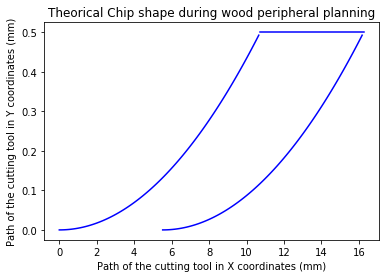

In [76]:
#Modules
############################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
############################################################


#Data inputs
#############################################################
A = input('Feed speed (m/min) :')
A = float(A)

N = input('Rotation speed (RPM) :')
N = float(N)

H = input('Cutting depth (mm) :')
H = float(H)

R = input('Radius of cutter (mm) :')
R = float(R)

Z = input('Number of knives on cutterhead :')
Z = float(Z)


r=input('Pitch radius of the pinion (mm) :') #ft
r = float(r)
#############################################################


#Data equations
#############################################################

#Wavelengths or feed per knife (mm)
o = (A *1000 / (Z * N))
o = float(o)

#Height of the machining wave (mm)
h = (o**2) / (8 * (R + (o*Z) / 3.1416))


#Average chip thickness (mm)
act = o * np.sqrt(H / (2*R)) 

#Angle made by the knife during chip machining 
alpha = np.arccos((R-H)/R) 

#Path of angle during chip machining between 0 to alpha
t = np.arange(0, alpha, 0.001)
t = -1*t

# Martellotti equation's for X and Y coordinates
X=(r * t)- (R * np.sin(t))
Y=R * (1-np.cos(t)) 
XO = X + o

debx = r * -alpha - R * np.sin(-alpha)
deby = R * (1 - np.cos(-alpha))

finx = (r * -alpha - R * np.sin(-alpha)) + o
finy = R * (1 - np.cos(-alpha))

a = [debx, finx]
b = [deby, finy]

#Plotting chip shape
#############################################################
plt.plot(X, Y, 'b') #same line width and color
plt.plot(XO, Y,  'b') #same line width and color
plt.plot(a,b, 'b')  # union of points

plt.xlabel('Path of the cutting tool in X coordinates (mm)') #show label in x position 
plt.ylabel('Path of the cutting tool in Y coordinates (mm)') #show label in x position
plt.title('Theorical Chip shape during wood peripheral planning')#show title Forme théorique du copeau

print("Average chip thickness (mm): ",act)
print("Wavelengths or feed per knife (mm): ", o)


#example: un porte-outil muni de 16 couteaux rectifiés présente un cylindre de coupe de onze pouces de diametre
#il tourne è 3450 tr/min et travaille en opposition è une vitesse d'alimentation de 1000pi/min

#Calculer:
# - Avance par dent ou largeur de l'onde par le couteau
# - hauteur de l'onde d'usinage